In [79]:
import json
import numpy as np
from PIL import Image
from pycocotools import mask
from matplotlib.patches import Rectangle

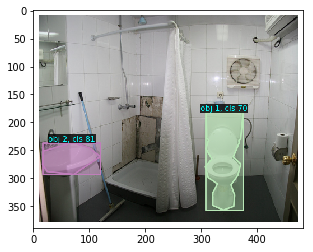

In [80]:
sample = Image.open("sample.jpg")
plt.imshow(sample)

In [81]:
# extract the coords of the bounding box
# using the pycocotools.mask.toBbox() function
with open("annotations.txt") as file:
    data = file.read().splitlines()
for row in data:
    string_list = row.split(",")
    annotations = []
i = 0
bbsArr = np.zeros((len(data[1:]),4))
description = ['','']
for row in data[1:]:
    string_list = row.split(",")
    print(string_list)
    img = Image.open(string_list[3]).convert("L")
    arr = np.array(img.getdata(), dtype=np.uint8).reshape(img.size[0], img.size[1], order="F")
    Rs = mask.encode(np.asfortranarray(arr.transpose()))
    # bbs     - [nx4] Bounding box(es) stored as [x y w h]
    bbsArr[i] = mask.toBbox(Rs)
    description[i] = 'obj '+str(string_list[1])+'. cls '+str(string_list[2])

    i += 1

['img1.jpg', '1', '70', 'mask1.png']
['img1.jpg', '2', '81', 'mask2.png']


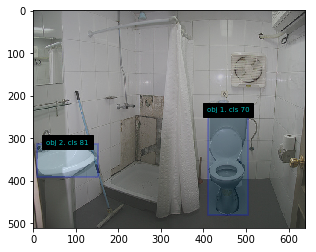

In [82]:
# plot the bounding box using matplotlib.patches.Rectangle
img1 = Image.open("img1.jpg")
msk1 = Image.open("mask1.png")
msk2 = Image.open("mask2.png")
# Create figure and axes
fig, ax = plt.subplots()
# Display the image
ax.imshow(img1)
i=0
for bbs in bbsArr:
    rect = Rectangle((bbs[0],bbs[1]),bbs[2],bbs[3], 
                      alpha=0.2,edgecolor='b',linewidth=2)
    # Add the patch to the Axes
    ax.add_patch(rect)
    ax.text(bbs[0]+bbs[2]/2,bbs[1],description[i],fontsize='x-small', 
            color='c',backgroundcolor='k',horizontalalignment='center')
    i += 1
plt.imshow(img1)
plt.imshow(msk1, cmap='binary', alpha=0.2)
plt.imshow(msk2, cmap='gray', alpha=0.2)